In [1]:
#importamos librerias necesarias para la practica
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
from sklearn import linear_model, metrics, preprocessing, cross_validation
import seaborn as sns
import sklearn as skl

%matplotlib inline

/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
#carga de los datos con los que se realizara la practica
data = pd.read_csv("census-income_1K.data", names=["age","detailed_occupation_recode","education","wage_per_hour",
                "enroll_in_edu_inst_last_wk","marital_stat","major_industry_code","major_occupation_code",
                "race","hispanic_origin","sex","member_of_a_labor_union","reason_for_unemployment", 
                "full_or_part_time_employment_stat","capital_gains","capital_losses","dividends_from_stocks",
                "tax_filer_stat","region_of_previous_residence","state_of_previous_residence",
                "detailed_household_and_family_stat","detailed_household_summary_in_household","instance_weight", 
                "migration_code−change_in_msa","migration_code−change_in_reg","migration_code−move_within_reg", 
                "live_in_this_house_1_year_ago","migration_prev_res_in_sunbelt","num_persons_worked_for_employer", 
                "family_members_under_18","country_of_birth_father","country_of_birth_mother","country_of_birth_self",
                "citizenship","own_business_or_self_employed","fill_inc_questionnaire_for_veterans_admin", 
                "veterans_benefits","weeks_worked_in_year","year","class"], sep=",", engine="python" , na_values="?")

In [3]:
#primer vistazo a los datos
data.head()

,,age,detailed_occupation_recode,education,wage_per_hour,enroll_in_edu_inst_last_wk,marital_stat,major_industry_code,major_occupation_code,race,hispanic_origin,...,country_of_birth_father,country_of_birth_mother,country_of_birth_self,citizenship,own_business_or_self_employed,fill_inc_questionnaire_for_veterans_admin,veterans_benefits,weeks_worked_in_year,year,class
58,Self-employed-not_incorporated,4,34,Some_college_but_no_degree,0,Not_in_universe,Divorced,Construction,Precision_production_craft_&_repair,White,All_other,...,United-States,United-States,United-States,Native-_Born_in_the_United_States,0,Not_in_universe,2,52,94,-_50000.
9,Not_in_universe,0,0,Children,0,Not_in_universe,Never_married,Not_in_universe_or_children,Not_in_universe,White,All_other,...,United-States,United-States,United-States,Native-_Born_in_the_United_States,0,Not_in_universe,0,0,94,-_50000.
10,Not_in_universe,0,0,Children,0,Not_in_universe,Never_married,Not_in_universe_or_children,Not_in_universe,White,All_other,...,United-States,United-States,United-States,Native-_Born_in_the_United_States,0,Not_in_universe,0,0,94,-_50000.
42,Private,34,3,Bachelors_degree(BA_AB_BS),0,Not_in_universe,Married-civilian_spouse_present,Finance_insurance_and_real_estate,Executive_admin_and_managerial,White,All_other,...,United-States,United-States,United-States,Native-_Born_in_the_United_States,0,Not_in_universe,2,52,94,-_50000.
34,Private,4,37,Some_college_but_no_degree,0,Not_in_universe,Married-civilian_spouse_present,Construction,Machine_operators_assmblrs_&_inspctrs,White,All_other,...,United-States,United-States,United-States,Native-_Born_in_the_United_States,0,Not_in_universe,2,52,94,-_50000.


In [4]:
print(data.shape[0],data.shape[1])

463 40


In [5]:
# sacamos una lista con los valores de las cabeceras que esta en un fichero txt que viene con los datos
f = open('header.txt','r')
lista = [] 
contenido = f.readlines()

for i in range (0,len(contenido),1):
    dato1=contenido[i].find(" ")
    dato2=contenido[i].find(" ",dato1+1)
    valor=contenido[i][dato1+1:dato2]
    if valor not in ['census-income', '@DATA']:
        lista.append(valor)

In [6]:
# con la lista de los datos cargamos los datos asignando correctamente las cabeceras de las columnas
original_data = pd.read_csv("census-income_1K.data" , names=lista, sep="," , engine="python" , na_values="?")

In [7]:
# se muestran los 5 primeros registros cargados
original_data.head(5)

,age,class_of_worker,detailed_industry_recode,detailed_occupation_recode,education,wage_per_hour,enroll_in_edu_inst_last_wk,marital_stat,major_industry_code,major_occupation_code,...,country_of_birth_father,country_of_birth_mother,country_of_birth_self,citizenship,own_business_or_self_employed,fill_inc_questionnaire_for_veterans_admin,veterans_benefits,weeks_worked_in_year,year,class
0,58,Self-employed-not_incorporated,4,34,Some_college_but_no_degree,0,Not_in_universe,Divorced,Construction,Precision_production_craft_&_repair,...,United-States,United-States,United-States,Native-_Born_in_the_United_States,0,Not_in_universe,2,52,94,-_50000.
1,9,Not_in_universe,0,0,Children,0,Not_in_universe,Never_married,Not_in_universe_or_children,Not_in_universe,...,United-States,United-States,United-States,Native-_Born_in_the_United_States,0,Not_in_universe,0,0,94,-_50000.
2,10,Not_in_universe,0,0,Children,0,Not_in_universe,Never_married,Not_in_universe_or_children,Not_in_universe,...,United-States,United-States,United-States,Native-_Born_in_the_United_States,0,Not_in_universe,0,0,94,-_50000.
3,42,Private,34,3,Bachelors_degree(BA_AB_BS),0,Not_in_universe,Married-civilian_spouse_present,Finance_insurance_and_real_estate,Executive_admin_and_managerial,...,United-States,United-States,United-States,Native-_Born_in_the_United_States,0,Not_in_universe,2,52,94,-_50000.
4,34,Private,4,37,Some_college_but_no_degree,0,Not_in_universe,Married-civilian_spouse_present,Construction,Machine_operators_assmblrs_&_inspctrs,...,United-States,United-States,United-States,Native-_Born_in_the_United_States,0,Not_in_universe,2,52,94,-_50000.


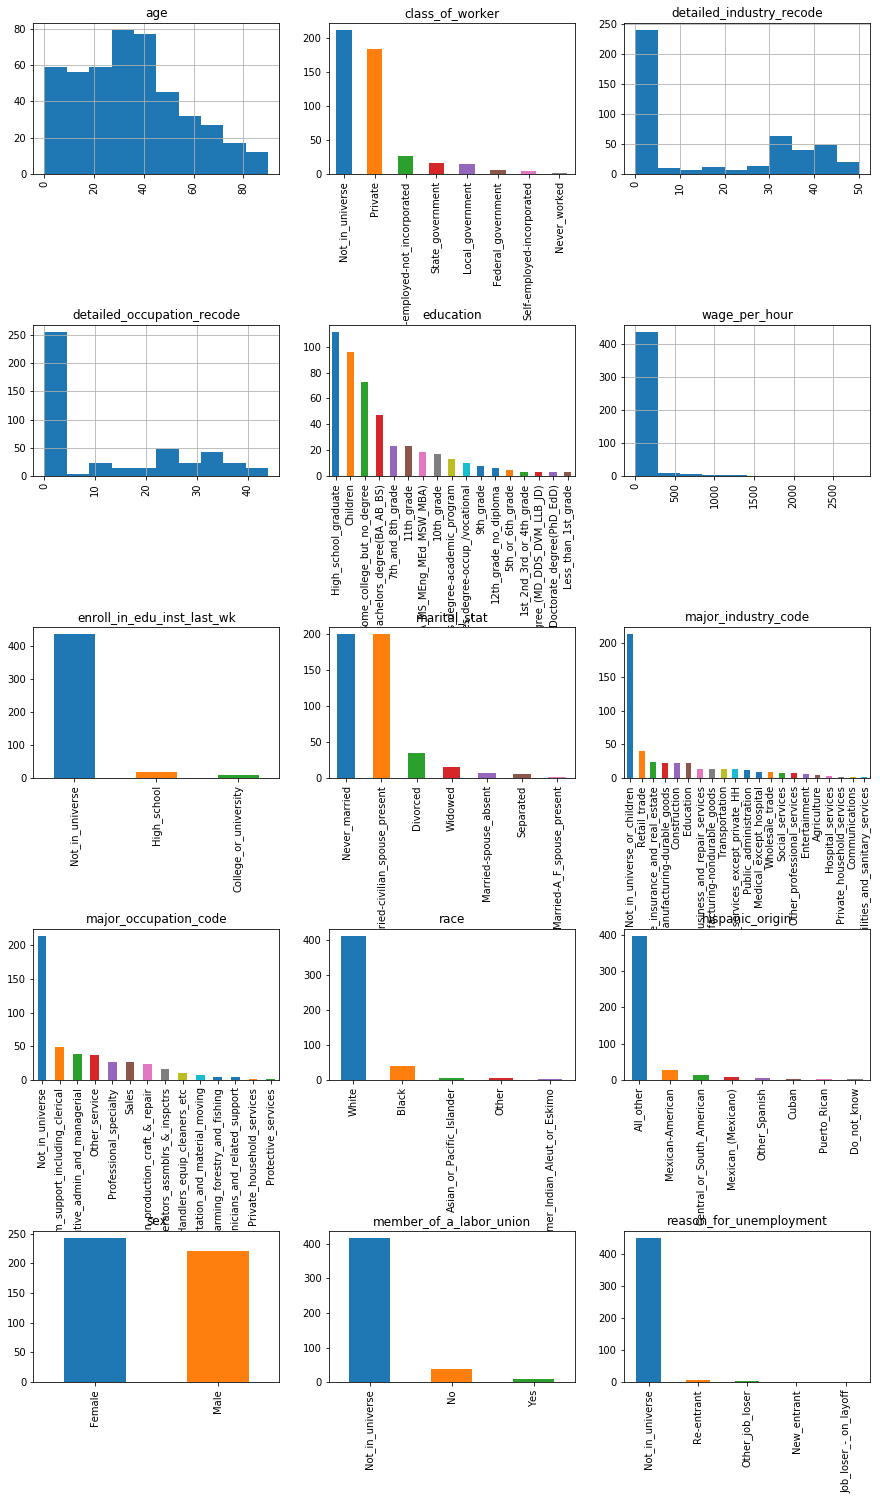

In [8]:
#mostramos los histogramas de los datos cargados. 15 primeras columnas.
fig = plt.figure(figsize=(15,75))
cols = 3
rows = math.ceil(float(original_data.shape[1]) / cols)

data_hist1 = original_data.iloc[:,0:15]

for i,column in enumerate(data_hist1.columns):
    ax = fig.add_subplot(rows, cols, i + 1) 
    ax.set_title(column)
    
    if data_hist1.dtypes[column] == np.object : 
        data_hist1[column].value_counts().plot(kind="bar", axes=ax)
    else :
        data_hist1[column].hist(axes=ax)
        plt.xticks(rotation="vertical")
        
plt.subplots_adjust(hspace=1, wspace=0.2)

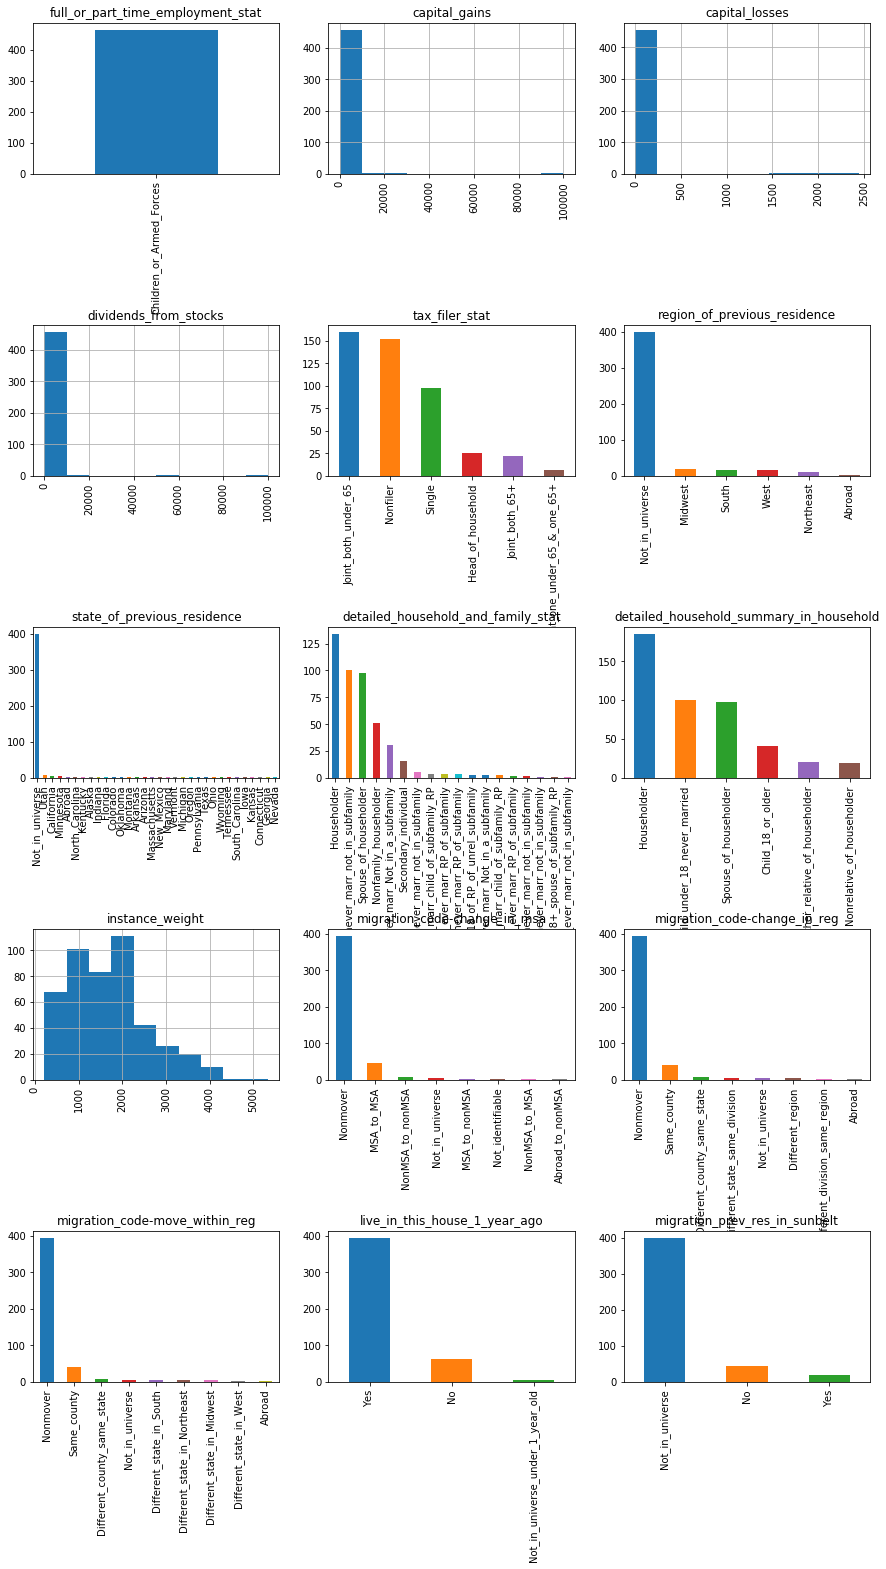

In [9]:
#mostramos los histogramas de los datos cargados. 15 siguientes columnas.
fig = plt.figure(figsize=(15,75))
cols = 3
rows = math.ceil(float(original_data.shape[1]) / cols)

data_hist2 = original_data.iloc[:,15:30]

for i,column in enumerate(data_hist2.columns):
    ax = fig.add_subplot(rows, cols, i + 1) 
    ax.set_title(column)
    
    if data_hist2.dtypes[column] == np.object : 
        data_hist2[column].value_counts().plot(kind="bar", axes=ax)
    else :
        data_hist2[column].hist(axes=ax)
        plt.xticks(rotation="vertical")
        
plt.subplots_adjust(hspace=1, wspace=0.2)

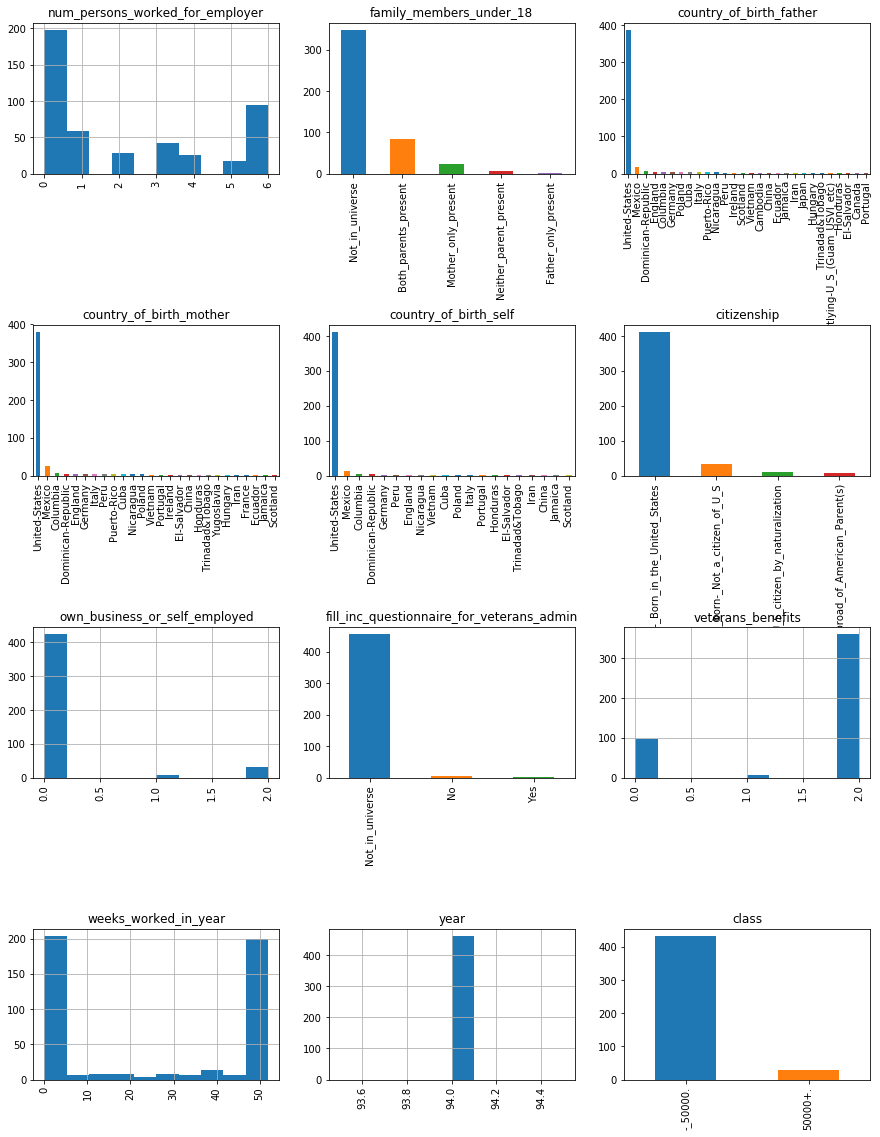

In [10]:
#mostramos los histogramas de los datos cargados. 15 ultimas columnas.
fig = plt.figure(figsize=(15,75))
cols = 3
rows = math.ceil(float(original_data.shape[1]) / cols)

data_hist3 = original_data.iloc[:,30:]

for i,column in enumerate(data_hist3.columns):
    ax = fig.add_subplot(rows, cols, i + 1) 
    ax.set_title(column)
    
    if data_hist3.dtypes[column] == np.object : 
        data_hist3[column].value_counts().plot(kind="bar", axes=ax)
    else :
        data_hist3[column].hist(axes=ax)
        plt.xticks(rotation="vertical")
        
plt.subplots_adjust(hspace=1, wspace=0.2)

In [11]:
# Funcion utilizada para convertir los datos categoricos en datos numericos y eliminar correlaciones entre atributos
# fruto de la codificacion.
def number_encode_features(df): 
    result = df.copy()
    encoders = {}
    for column in result.columns :
        if result.dtypes[column] == np.object:
            encoders [ column ] = preprocessing.LabelEncoder() 
            result[column] = encoders[column].fit_transform(result[column]) 
    return result , encoders

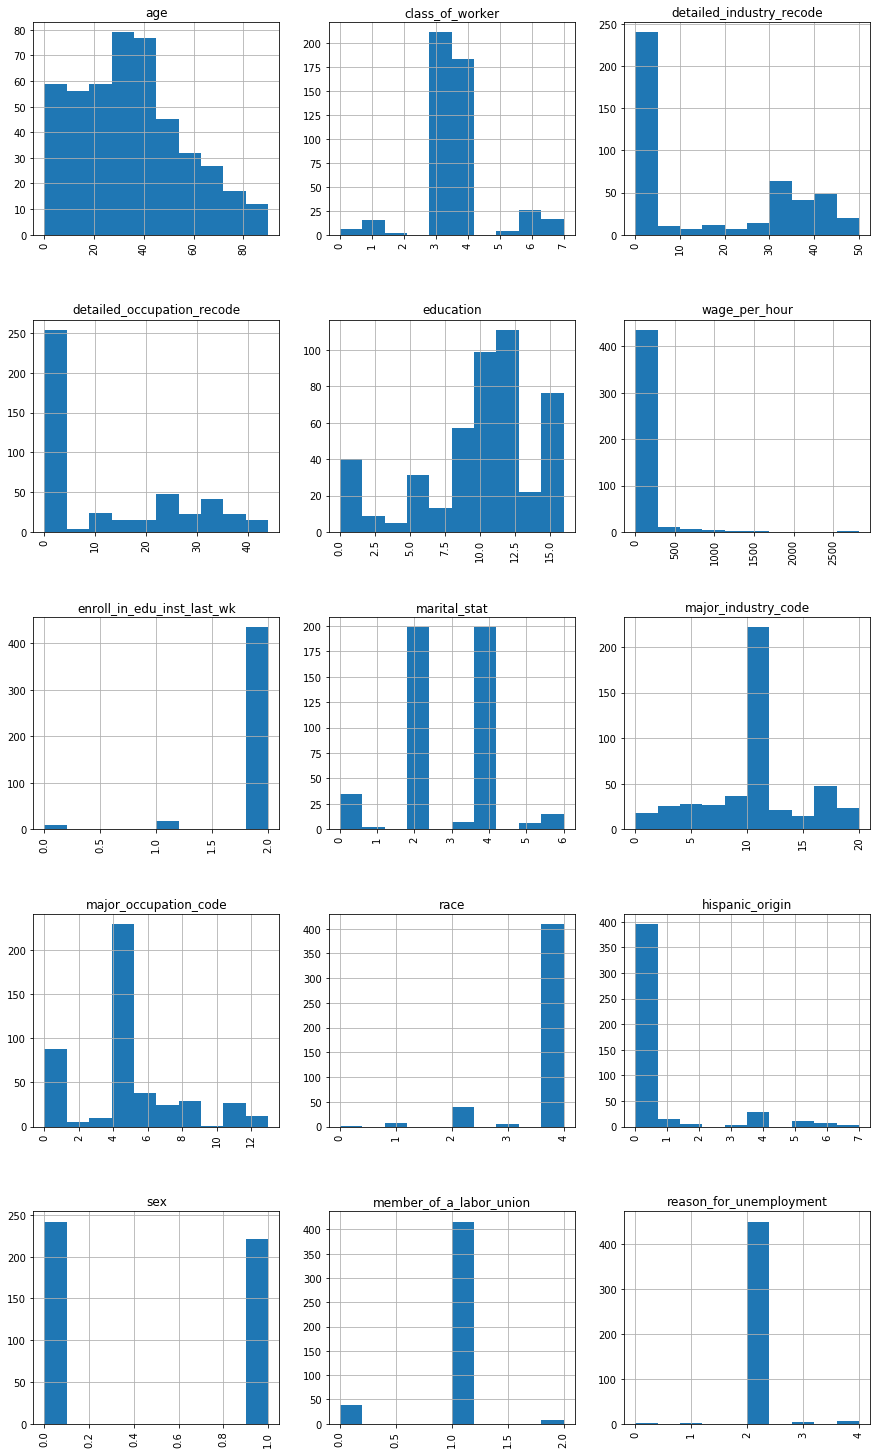

In [12]:
# mostramos el resultado tras aplicar la funcion anterior de conversion en datos numericos al dataframe cargado.
# Volvemos a mostrar los histogramas de los datos
encoded_data , encoders = number_encode_features(original_data)

fig = plt.figure(figsize=(15,75))
cols = 3
rows = math.ceil(float(encoded_data.shape[1]) / cols)

encoded_hist = encoded_data.iloc[:,0:15]

for i,column in enumerate(encoded_hist.columns):
    ax = fig.add_subplot(rows, cols, i + 1) 
    ax.set_title(column)
    
    if encoded_hist.dtypes[column] == np.object : 
        encoded_hist[column].value_counts().plot(kind="bar", axes=ax)
    else :
        encoded_hist[column].hist(axes=ax)
        plt.xticks(rotation="vertical")
        
plt.subplots_adjust(hspace=0.4, wspace=0.2)

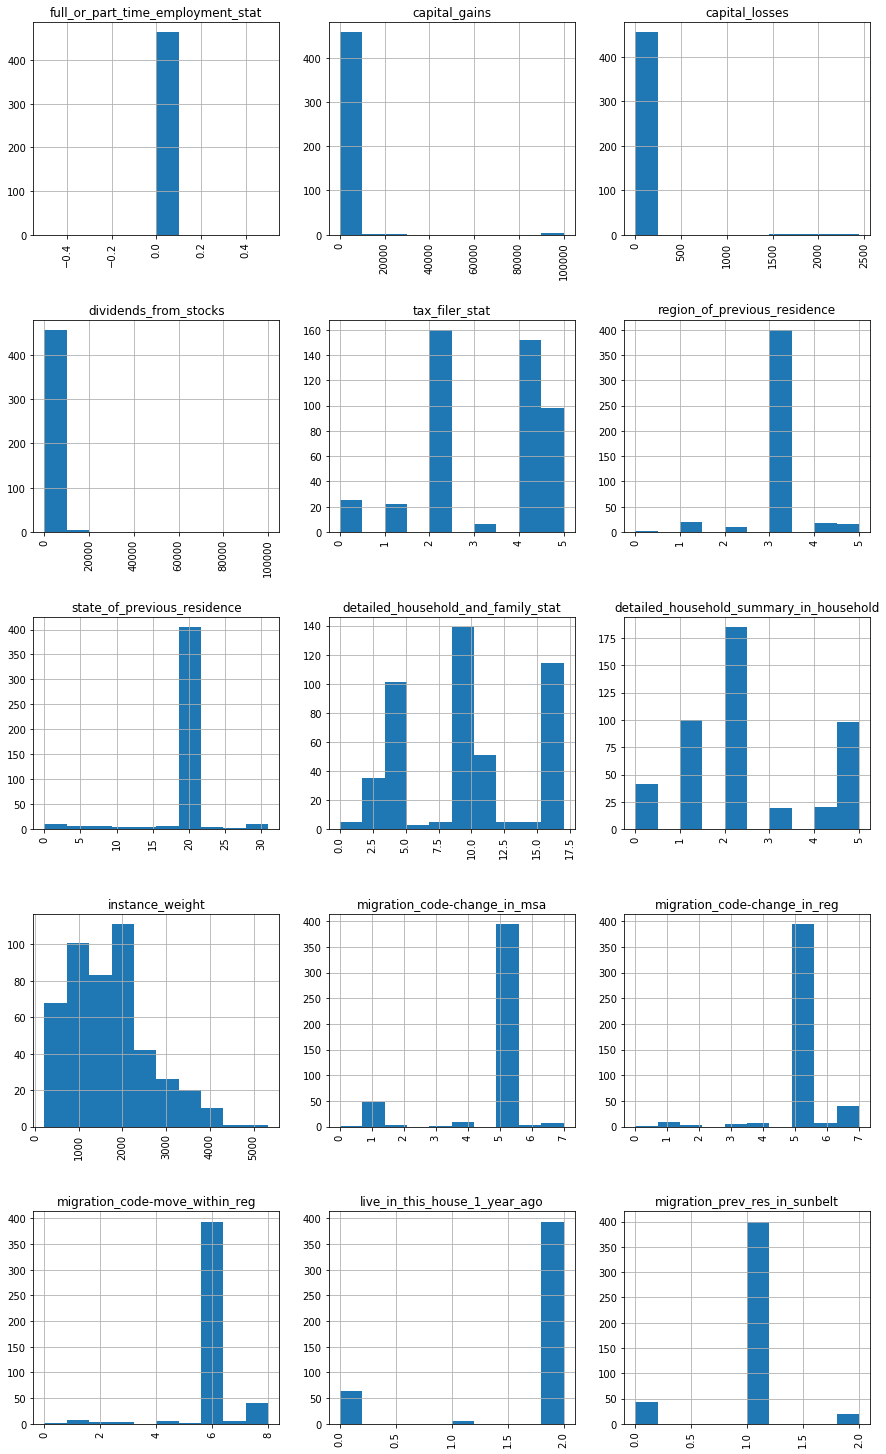

In [13]:
# Histogramas de las columnas 15 a 30 con los datos convertidos
fig = plt.figure(figsize=(15,75))
cols = 3
rows = math.ceil(float(encoded_data.shape[1]) / cols)

encoded_hist2 = encoded_data.iloc[:,15:30]

for i,column in enumerate(encoded_hist2.columns):
    ax = fig.add_subplot(rows, cols, i + 1) 
    ax.set_title(column)
    
    if encoded_hist2.dtypes[column] == np.object : 
        encoded_hist2[column].value_counts().plot(kind="bar", axes=ax)
    else :
        encoded_hist2[column].hist(axes=ax)
        plt.xticks(rotation="vertical")
        
plt.subplots_adjust(hspace=0.4, wspace=0.2)

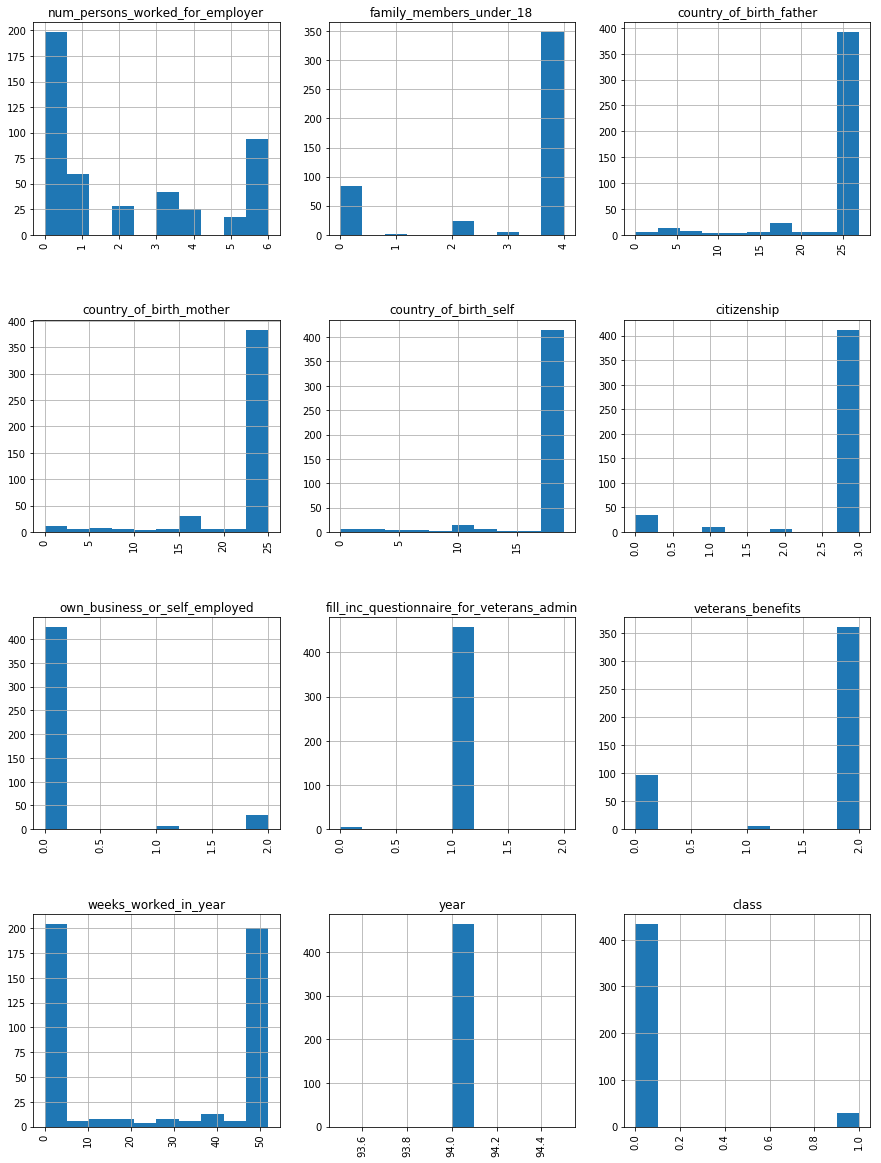

In [14]:
# Histogramas de las columnas 30 hasta el final con los datos convertidos
fig = plt.figure(figsize=(15,75))
cols = 3
rows = math.ceil(float(encoded_data.shape[1]) / cols)

encoded_hist3 = encoded_data.iloc[:,30:]

for i,column in enumerate(encoded_hist3.columns):
    ax = fig.add_subplot(rows, cols, i + 1) 
    ax.set_title(column)
    
    if encoded_hist3.dtypes[column] == np.object : 
        encoded_hist3[column].value_counts().plot(kind="bar", axes=ax)
    else :
        encoded_hist3[column].hist(axes=ax)
        plt.xticks(rotation="vertical")
        
plt.subplots_adjust(hspace=0.4, wspace=0.2)

In [19]:
# Construimos el clasificador. Se usa validacion cruzada, y se escalan los datos utilizando scikit-learn. El atributo
# class sera el atributo a predecir. Lo que se intentara es inferir si los sujetos estan por encima o por debajo.
X_train,X_test,y_train,y_test = cross_validation.train_test_split(encoded_data[encoded_data.columns.difference(\
                                                            ["class"])], encoded_data["class"], train_size =0.70)
scaler = preprocessing.StandardScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train.astype("float64")) , columns=X_train.columns)
X_test = scaler.transform(X_test.astype("float64"))

F1 score: 0.444444


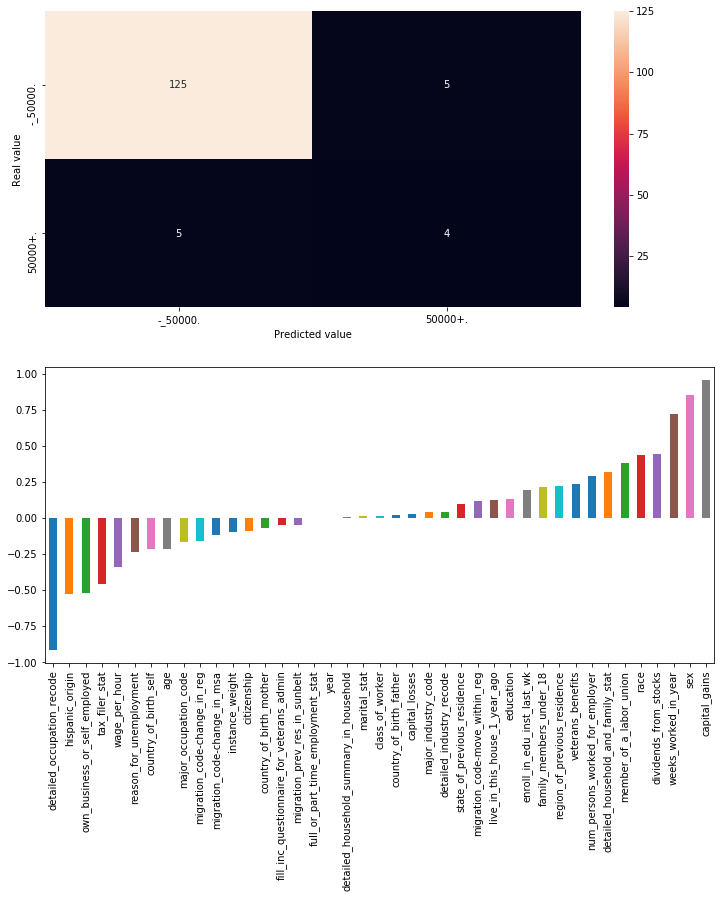

In [20]:
# usamos el modelo anterior
cls = linear_model.LogisticRegression()
cls.fit(X_train , y_train)
y_pred = cls.predict(X_test)
cm = metrics.confusion_matrix(y_test, y_pred)

plt.figure(figsize =(12,12))
plt.subplot(2 ,1 ,1)
sns.heatmap(cm, annot=True, fmt="d", xticklabels=encoders["class"].classes_, yticklabels=encoders["class"].classes_)
plt.ylabel("Real value")
plt.xlabel("Predicted value")

print("F1 score: %f" % skl.metrics.f1_score(y_test, y_pred)) 
coefs = pd.Series(cls.coef_[0], index=X_train.columns)
coefs.sort_values(inplace=True)
plt.subplot (2 ,1 ,2)
coefs.plot(kind="bar")
plt.show()

## Parte 1 Práctica

#### Hacemos uso de UTD, una librería de anonimización, y generamos 12 archivos con los datos anonimizados. Se usan los siguientes métodos: Datafly, Mondrian e Incognito. Y variamos para cada uno de ellos el valor de 'k' entre los siguientes valores: 2, 8, 17 y 32. Una vez tenemos los ficheros los cargamos generando los dataframes para realizar con ellos la práctica.

In [21]:
# lista con los nombres de las columnas
lista_columnas = ["age","detailed_occupation_recode","education","wage_per_hour",
                "enroll_in_edu_inst_last_wk","marital_stat","major_industry_code","major_occupation_code",
                "race","hispanic_origin","sex","member_of_a_labor_union","reason_for_unemployment", 
                "full_or_part_time_employment_stat","capital_gains","capital_losses","dividends_from_stocks",
                "tax_filer_stat","region_of_previous_residence","state_of_previous_residence",
                "detailed_household_and_family_stat","detailed_household_summary_in_household","instance_weight", 
                "migration_code−change_in_msa","migration_code−change_in_reg","migration_code−move_within_reg", 
                "live_in_this_house_1_year_ago","migration_prev_res_in_sunbelt","num_persons_worked_for_employer", 
                "family_members_under_18","country_of_birth_father","country_of_birth_mother","country_of_birth_self",
                "citizenship","own_business_or_self_employed","fill_inc_questionnaire_for_veterans_admin", 
                "veterans_benefits","weeks_worked_in_year","year","class"]

In [22]:
# creamos los 12 DFs a partir de los ficheros generados con el uso de UTD
datafly_2 = pd.read_csv("DataFly2K.data", names=lista_columnas, sep=",", engine="python" , na_values="?")
datafly_8 = pd.read_csv("DataFly8K.data", names=lista_columnas, sep=",", engine="python" , na_values="?")
datafly_17 = pd.read_csv("DataFly17K.data", names=lista_columnas, sep=",", engine="python" , na_values="?")
datafly_32 = pd.read_csv("DataFly32K.data", names=lista_columnas, sep=",", engine="python" , na_values="?")
mondrian_2 = pd.read_csv("Mondrian2K.data", names=lista_columnas, sep=",", engine="python" , na_values="?")
mondrian_8 = pd.read_csv("Mondrian8K.data", names=lista_columnas, sep=",", engine="python" , na_values="?")
mondrian_17 = pd.read_csv("Mondrian17K.data", names=lista_columnas, sep=",", engine="python" , na_values="?")
mondrian_32 = pd.read_csv("Mondrian32K.data", names=lista_columnas, sep=",", engine="python" , na_values="?")
incognito_2 = pd.read_csv("Incognito2K.data", names=lista_columnas, sep=",", engine="python" , na_values="?")
incognito_8 = pd.read_csv("Incognito8K.data", names=lista_columnas, sep=",", engine="python" , na_values="?")
incognito_17 = pd.read_csv("Incognito17K.data", names=lista_columnas, sep=",", engine="python" , na_values="?")
incognito_32 = pd.read_csv("Incognito32K.data", names=lista_columnas, sep=",", engine="python" , na_values="?")

In [23]:
# damos un vistazo a los primeros registros de uno de los dataframes anonimizados. Se puede ver como el atributo age
# de la edad aparece con un formato extraño, suponemos fruto del uso de la libreria
mondrian_2.head()

,age,detailed_occupation_recode,education,wage_per_hour,enroll_in_edu_inst_last_wk,marital_stat,major_industry_code,major_occupation_code,race,hispanic_origin,...,country_of_birth_father,country_of_birth_mother,country_of_birth_self,citizenship,own_business_or_self_employed,fill_inc_questionnaire_for_veterans_admin,veterans_benefits,weeks_worked_in_year,year,class
0,58.666666666666664:0.22222222222222224,34,Some_college_but_no_degree,0,Not_in_universe,Divorced,Construction,Precision_production_craft_&_repair,White,All_other,...,United-States,United-States,United-States,Native-_Born_in_the_United_States,0,Not_in_universe,2,52,94,-_50000.
1,8.714285714285714:0.20408163265306126,0,Children,0,Not_in_universe,Never_married,Not_in_universe_or_children,Not_in_universe,White,All_other,...,United-States,United-States,United-States,Native-_Born_in_the_United_States,0,Not_in_universe,0,0,94,-_50000.
2,10.0:0.0,0,Children,0,Not_in_universe,Never_married,Not_in_universe_or_children,Not_in_universe,White,All_other,...,United-States,United-States,United-States,Native-_Born_in_the_United_States,0,Not_in_universe,0,0,94,-_50000.
3,42.0:0.0,3,Bachelors_degree(BA_AB_BS),0,Not_in_universe,Married-civilian_spouse_present,Finance_insurance_and_real_estate,Executive_admin_and_managerial,White,All_other,...,United-States,United-States,United-States,Native-_Born_in_the_United_States,0,Not_in_universe,2,52,94,-_50000.
4,34.0:0.0,37,Some_college_but_no_degree,0,Not_in_universe,Married-civilian_spouse_present,Construction,Machine_operators_assmblrs_&_inspctrs,White,All_other,...,United-States,United-States,United-States,Native-_Born_in_the_United_States,0,Not_in_universe,2,52,94,-_50000.


In [24]:
# usamos la funcion de encoded antes de usar el modelo clasificador con los dataframes generados
datafly_2_data , encoders = number_encode_features(datafly_2)
datafly_8_data , encoders = number_encode_features(datafly_8)
datafly_17_data , encoders = number_encode_features(datafly_17)
datafly_32_data , encoders = number_encode_features(datafly_32)
mondrian_2_data , encoders = number_encode_features(mondrian_2)
mondrian_8_data , encoders = number_encode_features(mondrian_8)
mondrian_17_data , encoders = number_encode_features(mondrian_17)
mondrian_32_data , encoders = number_encode_features(mondrian_32)
incognito_2_data , encoders = number_encode_features(incognito_2)
incognito_8_data , encoders = number_encode_features(incognito_8)
incognito_17_data , encoders = number_encode_features(incognito_17)
incognito_32_data , encoders = number_encode_features(incognito_32)

In [27]:
# creamos una funcion para obtener el score de un DF con el clasificador, y la usaremos para obtener los datos para
# cada uno de los 12 dataframes obtenidos en el paso anterior
def calcular_f1(df):
    # usamos el codigo del clasificador usado en pasos anteriores
    X_train,X_test,y_train,y_test = cross_validation.train_test_split(df[df.columns.difference(["class"])],\
                                                                      df["class"], train_size =0.70)
    scaler = preprocessing.StandardScaler()
    X_train = pd.DataFrame(scaler.fit_transform(X_train.astype("float64")) , columns=X_train.columns)
    X_test = scaler.transform(X_test.astype("float64"))

    cls = linear_model.LogisticRegression()
    cls.fit(X_train , y_train)
    y_pred = cls.predict(X_test)
    cm = metrics.confusion_matrix(y_test, y_pred)

    return skl.metrics.f1_score(y_test, y_pred)

In [28]:
# utilizamos la funcion anterior del clasificador con los 12 DFs
f1_datafly2 = calcular_f1(datafly_2_data)
f1_datafly8 = calcular_f1(datafly_8_data)
f1_datafly17 = calcular_f1(datafly_17_data)
f1_datafly32 = calcular_f1(datafly_32_data)
f1_mondrian2 = calcular_f1(mondrian_2_data)
f1_mondrian8 = calcular_f1(mondrian_8_data)
f1_mondrian17 = calcular_f1(mondrian_17_data)
f1_mondrian32 = calcular_f1(mondrian_32_data)
f1_incognito2 = calcular_f1(incognito_2_data)
f1_incognito8 = calcular_f1(incognito_8_data)
f1_incognito17 = calcular_f1(incognito_17_data)
f1_incognito32 = calcular_f1(incognito_32_data)

print("Los scores para datafly --> 2:",f1_datafly2,", 8:",f1_datafly8,", 17:",f1_datafly17,", 32:",f1_datafly32)
print("Los scores para mondrian --> 2:",f1_mondrian2,", 8:",f1_mondrian8,", 17:",f1_mondrian17,", 32:",f1_mondrian32)
print("Los scores para incognito --> 2:",f1_incognito2,", 8:",f1_incognito8,", 17:",f1_incognito17,", 32:",f1_incognito32)

Los scores para datafly --> 2: 0.28571428571428575 , 8: 0.4444444444444444 , 17: 0.39999999999999997 , 32: 0.25
Los scores para mondrian --> 2: 0.42857142857142855 , 8: 0.42105263157894735 , 17: 0.3333333333333333 , 32: 0.33333333333333337
Los scores para incognito --> 2: 0.28571428571428575 , 8: 0.22222222222222224 , 17: 0.3333333333333333 , 32: 0.30769230769230765


#### Comentarios sobre los resultados al aplicar el clasificador

En general se ven peores resultados trás aplicar el modelo a los datos anonimizados, lo cuál tiene lógica. Aunque los resultados tampoco son demasiado claros, y suponemos que sería por estar probando con un dataset de pequeño tamaño para lo que necesitaría, y que a lo mejor habría que realizar un número elevado de pruebas para poder sacar alguna conclusión más general.

Se supone que al aumentar el número de K en los distintos métodos de anonimización, debería bajar el score ya que a mayor K mayor anonimidad y por tanto debe ser más difícil realizar la predicción. Se observa en algunos casos, pero como hemos dicho no se obtienen unos resultados totalmente concluyentes.

### Parte 2 Práctica

#### Comentar cómo varían los histogramas de los atributos sex y age para los datasets anonimizados. ¿A qué se debe esta variación?


In [25]:
# cogemos los nombres de los 12 datasets anonimizados 
dfs_anonimizados = ('DataFly2K.data','DataFly8K.data','DataFly17K.data','DataFly32K.data','Mondrian2K.data',
            'Mondrian8K.data','Mondrian17K.data','Mondrian32K.data','Incognito2K.data','Incognito8K.data',
            'Incognito17K.data','Incognito32K.data')

In [26]:
# metemos en una funcion la creacion del DF a partir de los datasets
def crear_df(dataset):
    df = pd.read_csv(dataset, names=lista_columnas, sep="," , engine="python" , na_values="?")
    return df

In [27]:
# recorremos los nombres anteriores para ir generando un DF con el atributo 'sex' de cada uno de ellos
d = {}
df_new = pd.DataFrame(data=d)

for df in dfs_anonimizados:
    df_new[df] = crear_df(df)['sex']

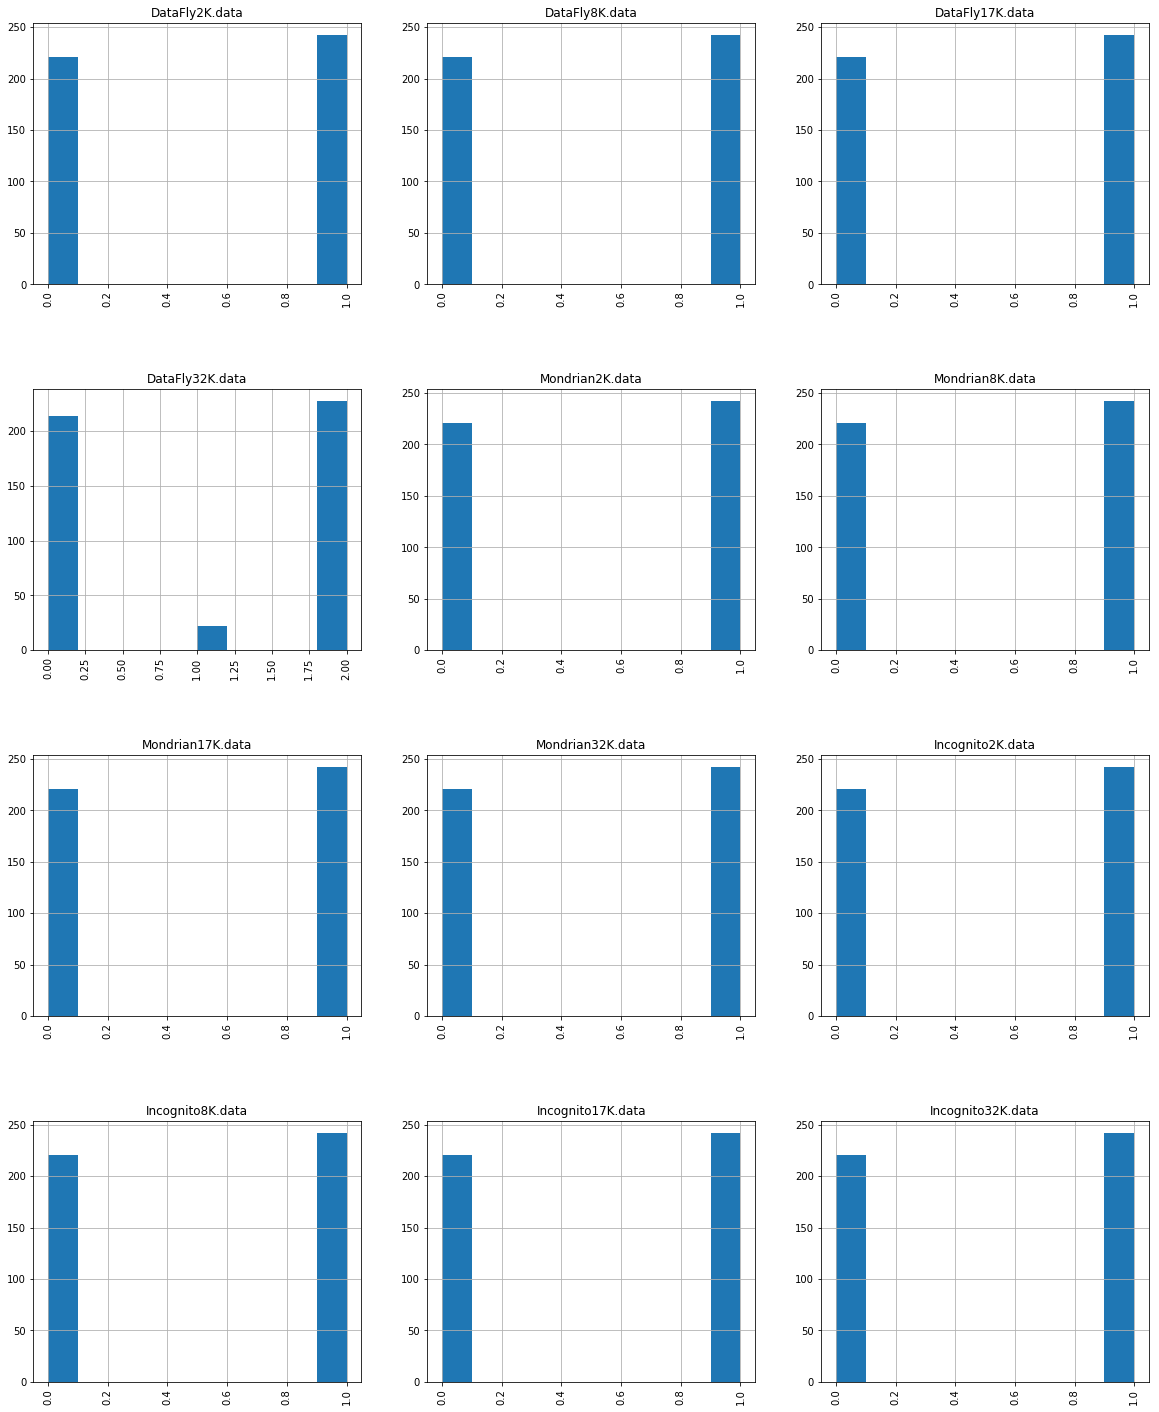

In [28]:
# una vez tenemos el DF con los atributos sex de cada uno de los datasets, pintamos los histogramas de este DF
# primero se debe hacer uso del encoder
encoded_data,encoders = number_encode_features(df_new)

fig = plt.figure(figsize=(20,25))
cols = 3
rows = math.ceil(float(encoded_data.shape[1]) / cols)

for i,column in enumerate(encoded_data.columns):
    ax = fig.add_subplot(rows, cols, i + 1) 
    ax.set_title(column)
    
    if encoded_data.dtypes[column] == np.object : 
        encoded_data[column].value_counts().plot(kind="bar", axes=ax)
    else :
        encoded_data[column].hist(axes=ax)
        plt.xticks(rotation="vertical")
        
plt.subplots_adjust(hspace=0.4, wspace=0.2)

#### Comentarios sobre los histogramas de sex

Los histogramas del atributo sex son prácticamente iguales todos, para los 12 datasets anonimizados con un tipo y k diferente. Tiene lógica ya que es un atributo que sólo puede tomar dos valores y por tanto al hacer las agrupaciones lo va a hacer siempre igual ya que no tiene una variabilidad que permita otro tipo de asignación o reparto.
Se ve como el reparto entre géneros en el dataset es muy similar, cercano al 50%.

In [29]:
# Creamos un DF para los atributos age igual que hicimos con sex arriba
d = {}
df_new = pd.DataFrame(data=d)

for df in dfs_anonimizados:
    df_new[df] = crear_df(df)['age']

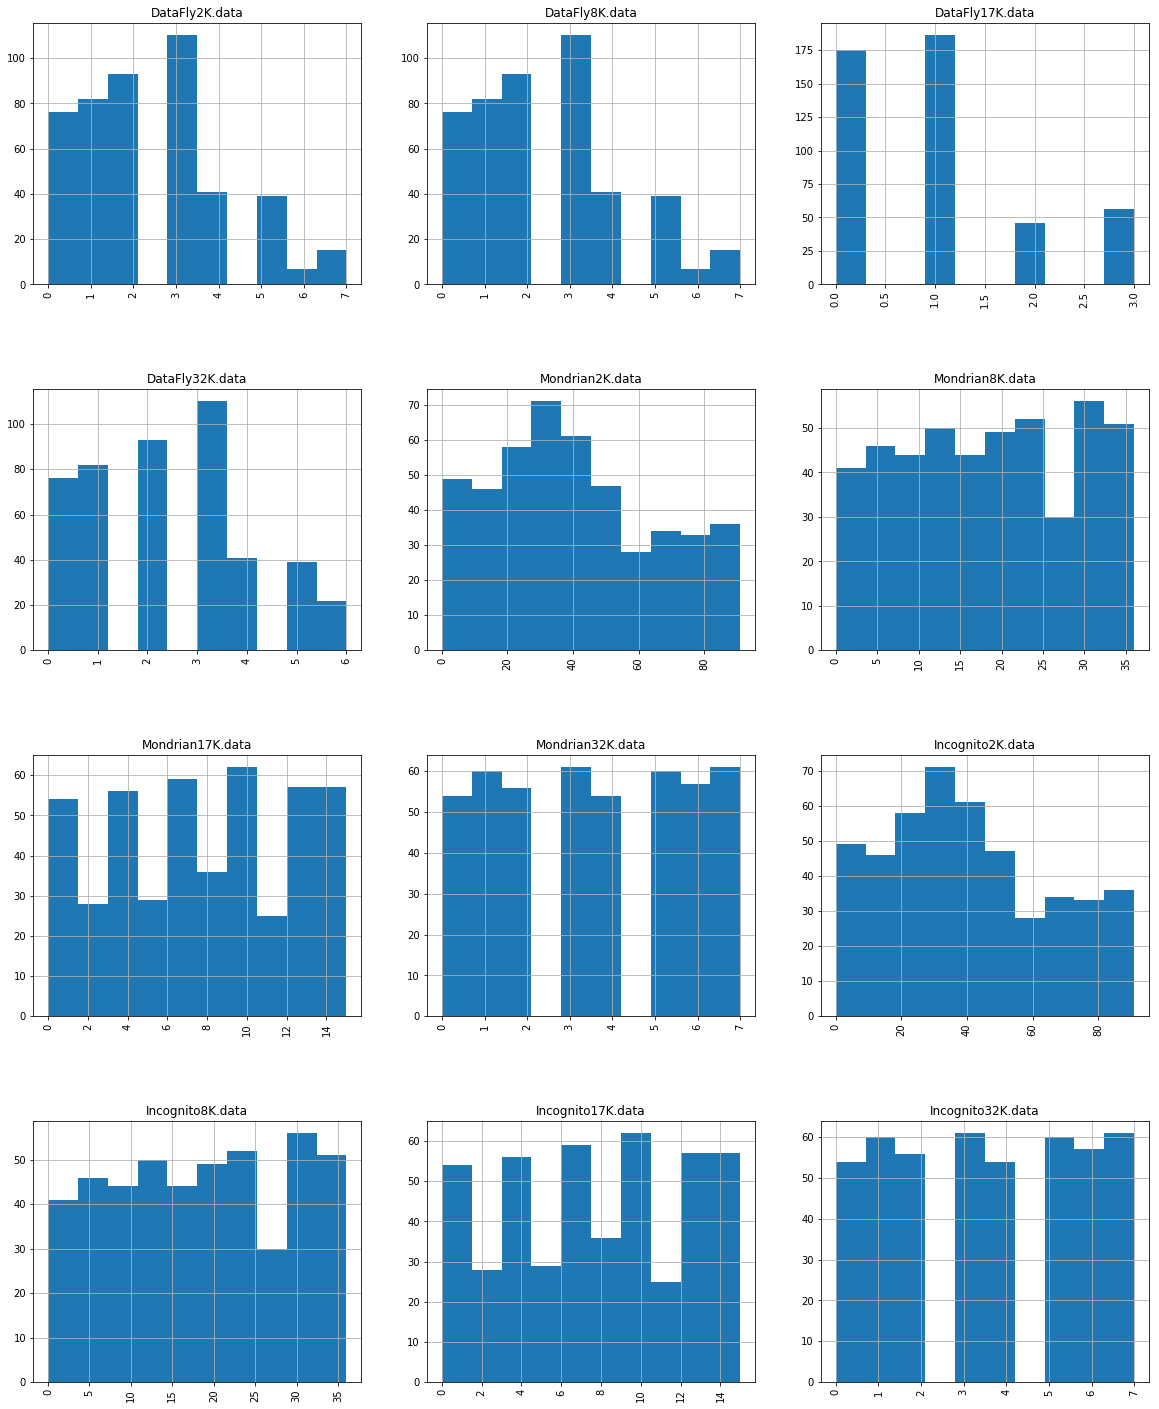

In [30]:
# Pintamos los histogramas de los atributos age
encoded_data,encoders = number_encode_features(df_new)

fig = plt.figure(figsize=(20,25))
cols = 3
rows = math.ceil(float(encoded_data.shape[1]) / cols)

for i,column in enumerate(encoded_data.columns):
    ax = fig.add_subplot(rows, cols, i + 1) 
    ax.set_title(column)
    
    if encoded_data.dtypes[column] == np.object : 
        encoded_data[column].value_counts().plot(kind="bar", axes=ax)
    else :
        encoded_data[column].hist(axes=ax)
        plt.xticks(rotation="vertical")
        
plt.subplots_adjust(hspace=0.4, wspace=0.2)

#### Comentarios sobre los histogramas de age

El atributo de "age" si tiene mayor variabilidad en su valor, y un rango mayor, por lo tanto al realizar los histogramas si se aprecia un reparto con mayor número de valores posibles, y como al aplicar una K diferente y un tipo de anonimización distinta se producen diferencias que se aprecian claramente en los histogramas.

Con los tipos "mondrian" e "incognito" se aprecia como los histogramas generados son practicamente iguales con cada una de las K. Si se aprecia mayor diferencia con el método de "datafly" que genera unos histogramas muy distintos a los de los otros métodos.

Se aprecia como a mayor K se van generando grupos más claros, más separados entre sí para los diferentes valores que coge la variable. Con menor K la distribución es más homogenea.


#### 1. ¿Tiene el fichero anonimizado el mismo número de columnas que el fichero original? Si no es así, ¿porqué tiene un número distinto de columnas?

In [32]:
#sacamos la dimensión del dataset original y los generados por UTD anonimizados
print("num_rows: %d\tColumnas: %d\n" % (data.shape[0], data.shape[1]) )
print("num_rows: %d\tColumnas: %d\n" % (datafly_2.shape[0], datafly_2.shape[1]) )
print("num_rows: %d\tColumnas: %d\n" % (datafly_8.shape[0], datafly_2.shape[1]) )
print("num_rows: %d\tColumnas: %d\n" % (datafly_17.shape[0], datafly_2.shape[1]) )
print("num_rows: %d\tColumnas: %d\n" % (datafly_32.shape[0], datafly_2.shape[1]) )
print("num_rows: %d\tColumnas: %d\n" % (mondrian_2.shape[0], datafly_2.shape[1]) )
print("num_rows: %d\tColumnas: %d\n" % (mondrian_8.shape[0], datafly_2.shape[1]) )
print("num_rows: %d\tColumnas: %d\n" % (mondrian_17.shape[0], datafly_2.shape[1]) )
print("num_rows: %d\tColumnas: %d\n" % (mondrian_32.shape[0], datafly_2.shape[1]) )
print("num_rows: %d\tColumnas: %d\n" % (incognito_2.shape[0], datafly_2.shape[1]) )
print("num_rows: %d\tColumnas: %d\n" % (incognito_8.shape[0], datafly_2.shape[1]) )
print("num_rows: %d\tColumnas: %d\n" % (incognito_17.shape[0], datafly_2.shape[1]) )
print("num_rows: %d\tColumnas: %d\n" % (incognito_32.shape[0], datafly_2.shape[1]) )

num_rows: 463	Columnas: 40

num_rows: 463	Columnas: 40

num_rows: 463	Columnas: 40

num_rows: 463	Columnas: 40

num_rows: 463	Columnas: 40

num_rows: 463	Columnas: 40

num_rows: 463	Columnas: 40

num_rows: 463	Columnas: 40

num_rows: 463	Columnas: 40

num_rows: 463	Columnas: 40

num_rows: 463	Columnas: 40

num_rows: 463	Columnas: 40

num_rows: 463	Columnas: 40



#### Comentarios pregunta 1

Si tendrían el mismo número de atributos los datos originales y los datasets generados trás anonimizar con UTD.

Para que tuvieran distinto número entendemos que debería configurarse en el fichero config.xml en la lista de "ID" e introducir aquellos atributos que no quisieramos que estuvieran en la salida de los ficheros anonimizados.

#### 2. En caso de que se quiera analizar la relación entre los atributos sex y class, ¿Cómo deberíamos modificar el fichero config.xml?

#### Comentarios pregunta 2

Debería eliminarse el atributo "age" de la lista de atributos que deben ser anonimizados